In [4]:
# Importujemy niezbędne biblioteki
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [5]:
# Ustawienie stylu wykresów (tło jasne)
sns.set_style('whitegrid')

In [6]:
# Załadowanie zbioru 'Pokemon.csv' do zmiennej df. Prosze zwrócić uwagę na dodatkowe argumenty
# index_col=0 - ustalenie pierwszej kolumny jako kolumna indeksująca
# encoding='latin' - załadowanie
df = pd.read_csv('Pokemon.csv', index_col=0, encoding='latin')

In [7]:
# Wypisanie 5 pierwszych rzędów zbioru wraz z nagłówkami
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [8]:
# Tam gdzie nazwy kolumn mają spacje, zastąpimy je podkreślnikiem '_'
df.columns = [c.replace(' ', '_') for c in df.columns]

In [9]:
df.head()

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [10]:
# Zadanie 1 - Stwórz wykres punktowy (scatter plot)
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
#
# Wykres ma przedstawiać zależność ataku (Attack) od obrony (Defense) dla pokemonów mających wyłącznie jeden typ (kolumna Type 2 bez wartości) dla 3 róznych etapów ewolucji pokemonów (kolumna Stage).
#
#     pogrupuj elementy względem ewolucji pokemona - skorzystaj z parametru 'hue'
#     aby sprawdzić czy Type 2 ma wartość NaN, wykorzystaj funkcję isnull())
#     na osi x przedstaw atak, a na osi y obronę pokemona
#     przesuń legendę wykorzystując funkcję sns.move_legend() https://seaborn.pydata.org/generated/seaborn.move_legend.html
#     dodaj tytuł, opisz oś x i y (możesz użyć matplotliba)
#
# ** Uwaga! Aby nie stracić przykładu rozwiązania, nie wywołuj ponownie poniższej pustej komórki. **

In [11]:
df_new = df[df["Type_2"].isnull()]

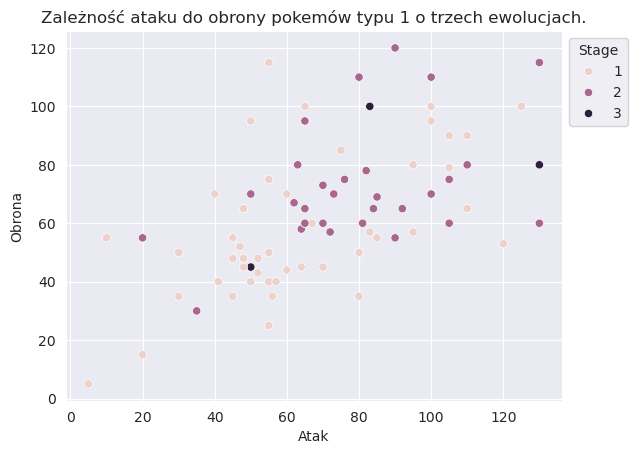

In [12]:
ax = sns.scatterplot(data=df_new, x='Attack', y="Defense", hue="Stage")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Zależność ataku do obrony pokemów typu 1 o trzech ewolucjach.")
plt.xlabel("Atak")
plt.ylabel ("Obrona")
plt.show()

In [13]:
# Zadanie 2 - Stwórz wykres słupkowy (bar plot)
#
# https://seaborn.pydata.org/generated/seaborn.barplot.html
#
# Wykres słupkowy ma przedstawiać liczbę pokemonów, których podstawowym typem (Type 1) jest typ trawiasy (Grass), ognisty (Fire) lub wodny (Water).
#
#     na początku odpowiednio przefiltruj dane, to znaczy wyciągnij informacje wyłacznie o wspomnianych trzech typach pokemonów
#
#     następnie pogrupuj dane względem typu
#
#     wyciągnij informację na temat ilości pokemonów dla każdego z typów
#         podpowiedź: dla ułatwienia zadania - jeśli używasz groupby() i count() - przekonwertuj serię danych na dataframe używając reset_index()
#
#     ustaw kolor słupków zgodnie z typem pokemona - skorzystaj z argumentu palette
#
#         możesz użyć poniższego schematu kolorów
#
#         pkmn_type_colors = ['#F08030','#78C850','#6890F0']
#
#     ustaw etykietę osi x i y, nadaj wykresowi tytuł (możesz użyć matplotlib)

/tmp/ipykernel_57605/1704351408.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_grouped, x = "Type_1", y = "Total", palette = pkmn_type_colors)


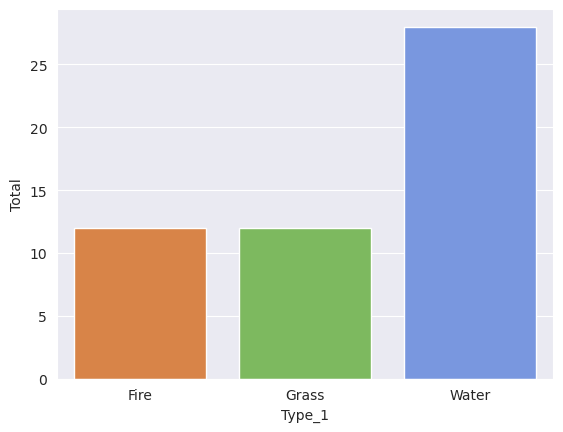

In [14]:
# Oba są poprawne
df_new2 = df[df['Type_1'].isin(['Grass', 'Water', 'Fire'])]
df_new2 = df[(df['Type_1'] == 'Grass') | (df['Type_1'] == 'Water') | (df['Type_1'] == 'Fire')]

df_grouped = df_new2.groupby('Type_1')['Total'].count().reset_index()

pkmn_type_colors = ['#F08030','#78C850','#6890F0']

sns.barplot(data = df_grouped, x = "Type_1", y = "Total", palette = pkmn_type_colors)
plt.show()

In [15]:
# Zadanie 3 - Stwórz wykres kołowy (pie chart)
#
# Biblioteka seaborn nie ma dedykowanej funkcji służącej do stworzenia wykresu kołowego. Aby stworzyć wykres użyj biblioteki matplotlib: plt.pie() , jednak aby nadać schemat kolorów skorzystaj z funkcji:
#
# sns.color_palette()
#
# https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
#
# Wykres kołowy powinien przedstawić jaki procent pokemonów stanowią pokemony legendarne:
#
#     zmień nazwy wartości kolumny "Legendary" z "False"/"True" na "Zwykły"/"Legendarny"
#     wyświetl wartości procentowe na wykresie kołowym stosując parametr autopct
#     nadaj wykresowi tytuł (możesz użyć matplotlib)

In [17]:
df_new3 = df.groupby('Legendary')['Legend'].count()
df_new3.head()

KeyError: 'Column not found: Legend'